<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/Dengue2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [140]:
dengue=pd.read_csv('/content/data set.csv', delimiter=';')

In [141]:
dengue

,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ZONA,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,...,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DIAS,CLASSI_FIN
0,4022.0,0,5.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,CHIKUNGUNYA
1,4020.0,1,6.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,CHIKUNGUNYA
2,4061.0,0,6.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,32,CHIKUNGUNYA
3,4046.0,1,6.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,CHIKUNGUNYA
4,4014.0,1,6.0,4.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,CHIKUNGUNYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,4031.0,0,5.0,9.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,22,OUTRAS_DOENCAS
17168,4070.0,0,6.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,7,OUTRAS_DOENCAS
17169,4034.0,0,5.0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,142,OUTRAS_DOENCAS
17170,4025.0,0,9.0,4.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,OUTRAS_DOENCAS


In [142]:
# Extrair os dois últimos dígitos para obter a idade
dengue['IDADE'] = dengue['NU_IDADE_N'].astype(str).str.replace('.0', '').str[-2:].astype(int)

# Verificar a nova coluna de idade
print(dengue[['NU_IDADE_N', 'IDADE']].head())

   NU_IDADE_N  IDADE
0      4022.0     22
1      4020.0     20
2      4061.0     61
3      4046.0     46
4      4014.0     14


In [143]:
dengue.drop('NU_IDADE_N', axis='columns', inplace=True)

In [144]:
# Obter a lista atual de colunas
colunas_atuais = dengue.columns.tolist()

In [145]:
# Remover 'IDADE' da lista de colunas
colunas_atuais.remove('IDADE')

# Inserir 'IDADE' na primeira posição da lista
colunas_atuais.insert(0, 'IDADE')

# Reindexar o DataFrame com a nova ordem de colunas
dengue = dengue.reindex(columns=colunas_atuais)

In [146]:
dengue

,IDADE,CS_SEXO,CS_GESTANT,CS_RACA,CS_ZONA,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,...,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DIAS,CLASSI_FIN
0,22,0,5.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,CHIKUNGUNYA
1,20,1,6.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,CHIKUNGUNYA
2,61,0,6.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,32,CHIKUNGUNYA
3,46,1,6.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,CHIKUNGUNYA
4,14,1,6.0,4.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,CHIKUNGUNYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,31,0,5.0,9.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,22,OUTRAS_DOENCAS
17168,70,0,6.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,7,OUTRAS_DOENCAS
17169,34,0,5.0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,142,OUTRAS_DOENCAS
17170,25,0,9.0,4.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,OUTRAS_DOENCAS


In [147]:
from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
encoder = LabelEncoder()

In [148]:
dengue['CS_SEXO'] = encoder.fit_transform(dengue['CS_SEXO'])
dengue['FEBRE'] = encoder.fit_transform(dengue['FEBRE'])
dengue['MIALGIA'] = encoder.fit_transform(dengue['MIALGIA'])
dengue['CEFALEIA'] = encoder.fit_transform(dengue['CEFALEIA'])
dengue['EXANTEMA'] = encoder.fit_transform(dengue['EXANTEMA'])
dengue['VOMITO'] = encoder.fit_transform(dengue['VOMITO'])
dengue['NAUSEA'] = encoder.fit_transform(dengue['NAUSEA'])
dengue['DOR_COSTAS'] = encoder.fit_transform(dengue['DOR_COSTAS'])
dengue['CONJUNTVIT'] = encoder.fit_transform(dengue['CONJUNTVIT'])
dengue['ARTRITE'] = encoder.fit_transform(dengue['ARTRITE'])
dengue['ARTRALGIA'] = encoder.fit_transform(dengue['ARTRALGIA'])
dengue['PETEQUIA_N'] = encoder.fit_transform(dengue['PETEQUIA_N'])
dengue['LACO'] = encoder.fit_transform(dengue['LACO'])
dengue['DOR_RETRO'] = encoder.fit_transform(dengue['DOR_RETRO'])
dengue['DIABETES'] = encoder.fit_transform(dengue['DIABETES'])
dengue['HEMATOLOG'] = encoder.fit_transform(dengue['HEMATOLOG'])
dengue['HEPATOPAT'] = encoder.fit_transform(dengue['HEPATOPAT'])
dengue['RENAL'] = encoder.fit_transform(dengue['RENAL'])
dengue['HIPERTENSA'] = encoder.fit_transform(dengue['HIPERTENSA'])
dengue['ACIDO_PEPT'] = encoder.fit_transform(dengue['ACIDO_PEPT'])
dengue['AUTO_IMUNE'] = encoder.fit_transform(dengue['AUTO_IMUNE'])
dengue['CLASSI_FIN'] = encoder.fit_transform(dengue['CLASSI_FIN'])

In [149]:
# Verificar os valores únicos atuais de CS_GESTANT
print("Valores únicos antes da transformação:", dengue['CS_GESTANT'].unique())

# Mapear os valores para garantir consistência
# - 1: 1º Trimestre
# - 2: 2º Trimestre
# - 3: 3º Trimestre
# - 4: Idade gestacional ignorada
# - 5: Não gestante
# - 6: Não se aplica
# - 9: Ignorado (vamos transformar em 6, "Não se aplica")
dengue['CS_GESTANT'] = dengue['CS_GESTANT'].fillna(6).replace({9: 6}).astype(int)

# Verificar os valores únicos após a transformação
print("Valores únicos após a transformação:", dengue['CS_GESTANT'].unique())

# Verificar a distribuição dos valores
print("Distribuição de CS_GESTANT:")
print(dengue['CS_GESTANT'].value_counts())

Valores únicos antes da transformação: [5. 6. 9. 1. 2. 3. 4. 0.]
Valores únicos após a transformação: [5 6 1 2 3 4 0]
Distribuição de CS_GESTANT:
CS_GESTANT
6    13108
5     3836
2       77
3       75
1       53
4       19
0        4
Name: count, dtype: int64


In [150]:
# Verificar os valores únicos antes da transformação
print("Valores únicos de CS_RACA antes:", dengue['CS_RACA'].unique())
print("Valores únicos de CS_ZONA antes:", dengue['CS_ZONA'].unique())

# Arrumar CS_RACA
# - Substituir 9 (Ignorado) por 4 (Parda)
# - Substituir NaN por 4 (Parda)
dengue['CS_RACA'] = dengue['CS_RACA'].fillna(4).replace({9: 4}).astype(int)

# Arrumar CS_ZONA
# - Substituir 9 (Ignorado) por 1 (Urbana)
# - Substituir NaN por 1 (Urbana)
dengue['CS_ZONA'] = dengue['CS_ZONA'].fillna(1).replace({9: 1}).astype(int)

# Verificar os valores únicos após a transformação
print("Valores únicos de CS_RACA após:", dengue['CS_RACA'].unique())
print("Valores únicos de CS_ZONA após:", dengue['CS_ZONA'].unique())

# Verificar a distribuição dos valores
print("Distribuição de CS_RACA:")
print(dengue['CS_RACA'].value_counts())

print("Distribuição de CS_ZONA:")
print(dengue['CS_ZONA'].value_counts())

Valores únicos de CS_RACA antes: [1. 4. 9. 2. 0. 3. 5.]
Valores únicos de CS_ZONA antes: [3. 1. 9. 2.]
Valores únicos de CS_RACA após: [1 4 2 0 3 5]
Valores únicos de CS_ZONA após: [3 1 2]
Distribuição de CS_RACA:
CS_RACA
4    16028
1      690
5      176
2      156
0       88
3       34
Name: count, dtype: int64
Distribuição de CS_ZONA:
CS_ZONA
1    16992
2      175
3        5
Name: count, dtype: int64


In [151]:
dengue

,IDADE,CS_SEXO,CS_GESTANT,CS_RACA,CS_ZONA,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,...,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DIAS,CLASSI_FIN
0,22,0,5,1,3,0,0,0,1,1,...,0,1,1,1,1,1,1,1,1,0
1,20,1,6,4,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,6,0
2,61,0,6,4,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,32,0
3,46,1,6,4,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,2,0
4,14,1,6,4,1,0,0,0,1,0,...,0,1,1,1,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,31,0,5,4,1,0,0,1,1,0,...,1,1,1,1,1,1,1,1,22,2
17168,70,0,6,4,1,0,1,1,1,0,...,1,0,1,1,1,1,1,1,7,2
17169,34,0,5,4,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,142,2
17170,25,0,6,4,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,2


In [152]:
dengue.dtypes

,0
IDADE,int64
CS_SEXO,int64
CS_GESTANT,int64
CS_RACA,int64
CS_ZONA,int64
FEBRE,int64
MIALGIA,int64
CEFALEIA,int64
EXANTEMA,int64
VOMITO,int64


In [153]:
# Verificar os valores únicos antes da transformação
print("Valores únicos de DIAS antes:", dengue['DIAS'].unique())

# Substituir valores negativos por 0
dengue['DIAS'] = dengue['DIAS'].apply(lambda x: max(x, 0))

# Verificar os valores únicos após a transformação
print("Valores únicos de DIAS após:", dengue['DIAS'].unique())

# Verificar a distribuição dos valores
print("Distribuição de DIAS:")
print(dengue['DIAS'].value_counts().sort_index())

Valores únicos de DIAS antes: [    1     6    32     2    81     0    14     4     3    12    19     7
    16     5    31    39    46     8    15     9    11    18    17    29
   375   738   521   384   370   369   471   233   305    40   787   447
    30    43   195    49    61   713   103    24   172   495   491   197
   314   845    28   142    67    13   307   145    66   132    45   301
   136    33    10   367   357   234   108   120   111    26    42   130
   113    87    22   114   117   214   119    88    93   128    53    70
    85   335    25   248   350   217    44    64    99    98   101    65
    73    77    76   185    75    50    79   823    62    78   263    90
    92    27    20    94    91    74    58    51   257    59    97   310
    47   152    83    21    35    34    48   198   224    84   462    36
   243   246    82    37   105    60   366   300    80   133   122    55
   129   438   109   938    63    57   254   126   229    72    69   244
    23   230   151   

In [154]:
# Definir um limite máximo (por exemplo, 365 dias)
limite_maximo = 365

# Substituir valores acima do limite pelo limite máximo
dengue['DIAS'] = dengue['DIAS'].apply(lambda x: min(x, limite_maximo))

# Verificar os valores únicos após tratar extremos
print("Valores únicos de DIAS após tratar extremos:", dengue['DIAS'].unique())

Valores únicos de DIAS após tratar extremos: [  1   6  32   2  81   0  14   4   3  12  19   7  16   5  31  39  46   8
  15   9  11  18  17  29 365 233 305  40  30  43 195  49  61 103  24 172
 197 314  28 142  67  13 307 145  66 132  45 301 136  33  10 357 234 108
 120 111  26  42 130 113  87  22 114 117 214 119  88  93 128  53  70  85
 335  25 248 350 217  44  64  99  98 101  65  73  77  76 185  75  50  79
  62  78 263  90  92  27  20  94  91  74  58  51 257  59  97 310  47 152
  83  21  35  34  48 198 224  84  36 243 246  82  37 105  60 300  80 133
 122  55 129 109  63  57 254 126 229  72  69 244  23 230 151 226  71 189
 169  56  54  41  38 225 364 121 186 104 210 216  52 154 190  68 313 220
 165 199 107 293 296 100 164 106 110 112 159 123 176 161 352 139 143 134
 102 177 158 156 194 174 218 153 228 253 237 241 222 223 215 207 202 196
 193 192 178 182 115 116 232 168 147 327 160 155 146 135  89 137 150 247
 251 302 175 183 213 125  96 274  86 171  95 184 138 127 328 141 278 280
 131 1

In [155]:
# Remover as colunas de idade e dias de sintomas
dengue = dengue.drop(['IDADE', 'DIAS', 'CS_GESTANT', 'CS_RACA', 'CS_SEXO', 'CS_ZONA'], axis=1)

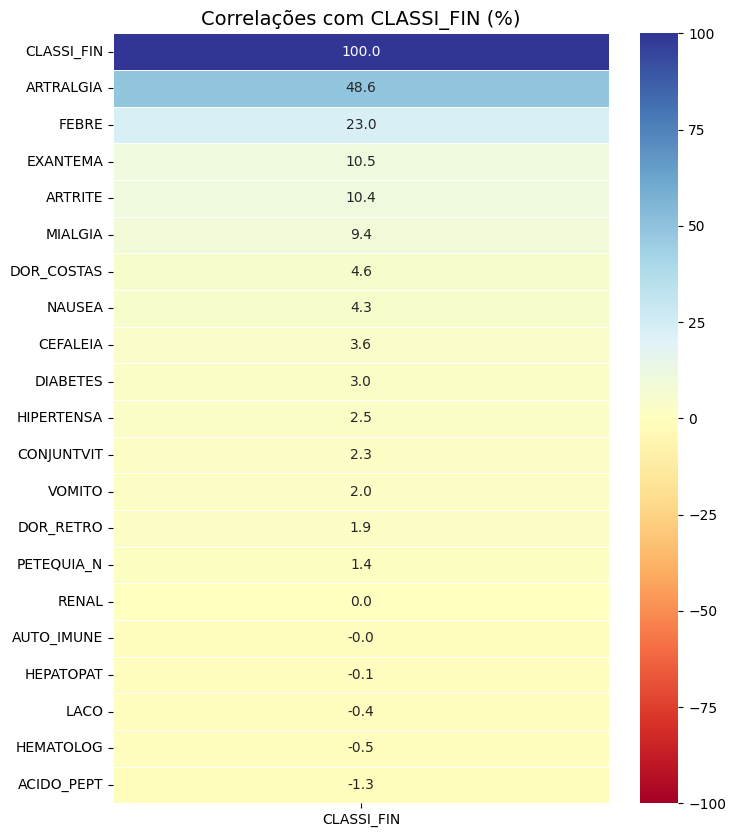

In [156]:
# Calcular a matriz de correlação
correlacao = dengue.corr()

# Converter correlações para porcentagem
correlacao_percent = correlacao * 100

# Filtrar apenas as correlações com CLASSI_FIN (ou outra coluna de interesse)
correlacao_classi_fin = correlacao_percent[['CLASSI_FIN']].sort_values(by='CLASSI_FIN', ascending=False)

# Configurar o estilo do heatmap
plt.figure(figsize=(8, 10))  # Ajustar o tamanho do gráfico
sns.heatmap(
    correlacao_classi_fin,  # Usar apenas as correlações com CLASSI_FIN
    annot=True,             # Mostrar os valores de correlação
    cmap='RdYlBu',          # Gradiente de cores (vermelho, amarelo, azul)
    fmt='.1f',              # Formatar os números para uma casa decimal
    linewidths=0.5,         # Adicionar linhas entre as células
    vmin=-100, vmax=100     # Definir os limites da escala de cores (-100% a 100%)
)
plt.title('Correlações com CLASSI_FIN (%)', fontsize=14)
plt.show()

Distribuição das Classes:
CLASSI_FIN
0    11448
1     5724
Name: count, dtype: int64

Acurácia (Random Forest): 0.7219796215429404

Relatório de Classificação (Random Forest):
                    precision    recall  f1-score   support

Dengue/Chikungunya       0.80      0.79      0.80      2340
    Outras Doenças       0.56      0.57      0.57      1095

          accuracy                           0.72      3435
         macro avg       0.68      0.68      0.68      3435
      weighted avg       0.72      0.72      0.72      3435



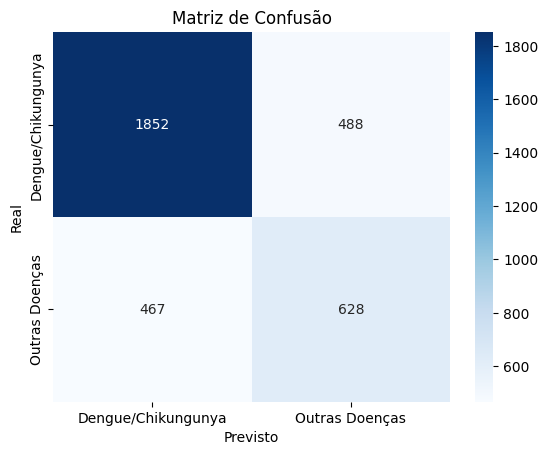


Importância das Features:
       Feature  Importance
9    ARTRALGIA    0.383162
0        FEBRE    0.137974
1      MIALGIA    0.064533
3     EXANTEMA    0.057517
8      ARTRITE    0.045670
4       VOMITO    0.040802
2     CEFALEIA    0.040547
5       NAUSEA    0.039574
12   DOR_RETRO    0.036880
6   DOR_COSTAS    0.034074
10  PETEQUIA_N    0.024878
7   CONJUNTVIT    0.022361
17  HIPERTENSA    0.020206
11        LACO    0.013909
13    DIABETES    0.012055
18  ACIDO_PEPT    0.008153
16       RENAL    0.004952
15   HEPATOPAT    0.004811
14   HEMATOLOG    0.004072
19  AUTO_IMUNE    0.003871


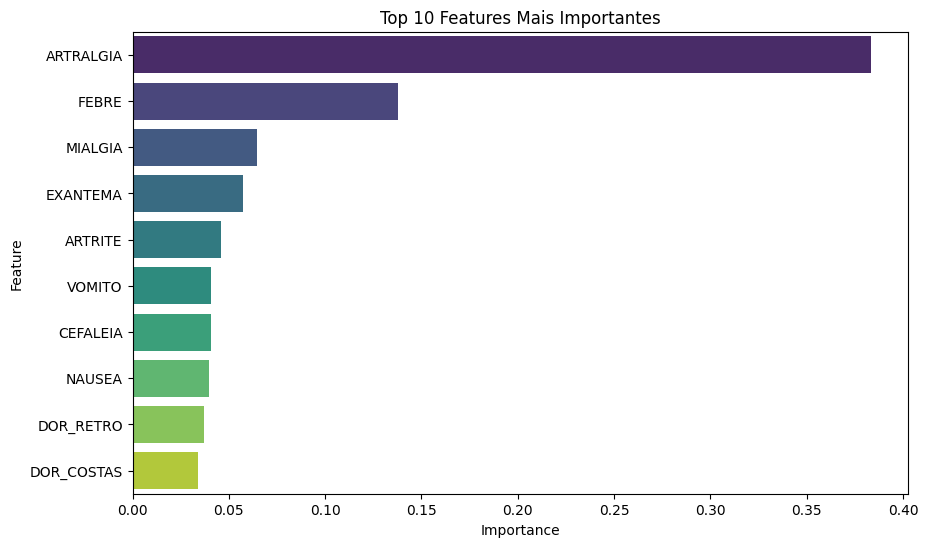

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Agrupar dengue e chikungunya como uma única classe (0 = Dengue/Chikungunya, 1 = Outras Doenças)
dengue['CLASSI_FIN'] = dengue['CLASSI_FIN'].apply(lambda x: 0 if x in [0, 1] else 1)



# Separar features (X) e target (y)
X = dengue.drop('CLASSI_FIN', axis=1)  # Todas as colunas, exceto a classificação
y = dengue['CLASSI_FIN']  # Apenas a coluna de classificação

from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X = scaler_census.fit_transform(X)
# Verificar a distribuição das classes
print("Distribuição das Classes:")
print(dengue['CLASSI_FIN'].value_counts())




# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar se há mais de uma classe no conjunto de treino
if len(y_train.unique()) > 1:
    # Treinar um modelo de Random Forest
    modelo_rf = RandomForestClassifier(random_state=42)
    modelo_rf.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = modelo_rf.predict(X_test)

    # Métricas de avaliação
    print("\nAcurácia (Random Forest):", accuracy_score(y_test, y_pred))
    print("\nRelatório de Classificação (Random Forest):")
    print(classification_report(y_test, y_pred, target_names=['Dengue/Chikungunya', 'Outras Doenças']))

    # Matriz de Confusão
    matriz_confusao = confusion_matrix(y_test, y_pred)
    sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Dengue/Chikungunya', 'Outras Doenças'],
                yticklabels=['Dengue/Chikungunya', 'Outras Doenças'])
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

   # Análise de Importância das Features
    importancia = modelo_rf.feature_importances_

   # Get feature names from original DataFrame before scaling
    feature_names = dengue.drop('CLASSI_FIN', axis=1).columns

    # Criar um DataFrame para visualização, using feature_names
    importancia_df = pd.DataFrame({
    'Feature': feature_names,  # Use feature_names here
    'Importance': importancia
    }).sort_values(by='Importance', ascending=False)

    # Exibir as features mais importantes
    print("\nImportância das Features:")
    print(importancia_df)

    # Plotar a importância das features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importancia_df.head(10), palette='viridis')
    plt.title('Top 10 Features Mais Importantes')
    plt.show()

else:
    print("\nAtenção: O dataset contém apenas uma classe. Não é possível treinar um modelo de classificação.")

Acurácia (XGBoost): 0.7228529839883552

Relatório de Classificação (XGBoost):
                    precision    recall  f1-score   support

Dengue/Chikungunya       0.80      0.80      0.80      2340
    Outras Doenças       0.56      0.57      0.57      1095

          accuracy                           0.72      3435
         macro avg       0.68      0.68      0.68      3435
      weighted avg       0.72      0.72      0.72      3435



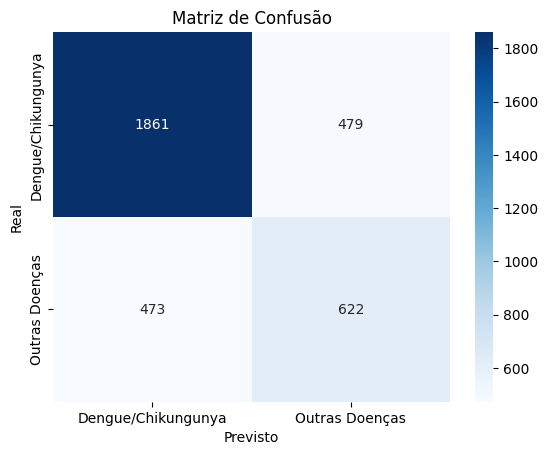

In [158]:
from xgboost import XGBClassifier

# Treinar um modelo de XGBoost
modelo_xgb = XGBClassifier(random_state=42)
modelo_xgb.fit(X_train, y_train)

# Avaliar o modelo
y_pred_xgb = modelo_xgb.predict(X_test)
print("Acurácia (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nRelatório de Classificação (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=['Dengue/Chikungunya', 'Outras Doenças']))

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dengue/Chikungunya', 'Outras Doenças'],
            yticklabels=['Dengue/Chikungunya', 'Outras Doenças'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


Acurácia (Naive Bayes): 0.607278020378457

Relatório de Classificação (Naive Bayes):
                    precision    recall  f1-score   support

Dengue/Chikungunya       0.79      0.58      0.67      2340
    Outras Doenças       0.43      0.67      0.52      1095

          accuracy                           0.61      3435
         macro avg       0.61      0.62      0.59      3435
      weighted avg       0.67      0.61      0.62      3435



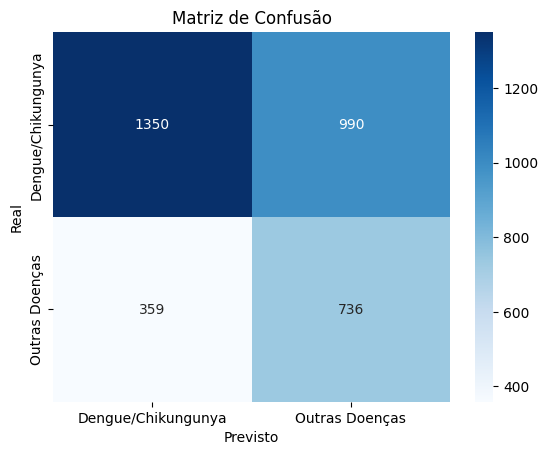

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar features (X) e target (y)
X = dengue.drop('CLASSI_FIN', axis=1)  # Todas as colunas, exceto a classificação
y = dengue['CLASSI_FIN']  # Apenas a coluna de classificação

from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X = scaler_census.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de Naive Bayes (GaussianNB)
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_nb.predict(X_test)

# Métricas de avaliação
print("\nAcurácia (Naive Bayes):", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação (Naive Bayes):")
print(classification_report(y_test, y_pred, target_names=['Dengue/Chikungunya', 'Outras Doenças']))

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dengue/Chikungunya', 'Outras Doenças'],
            yticklabels=['Dengue/Chikungunya', 'Outras Doenças'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


Acurácia (Regressão Logística): 0.7211062590975255

Relatório de Classificação (Regressão Logística):
                    precision    recall  f1-score   support

Dengue/Chikungunya       0.75      0.89      0.81      2340
    Outras Doenças       0.61      0.35      0.44      1095

          accuracy                           0.72      3435
         macro avg       0.68      0.62      0.63      3435
      weighted avg       0.70      0.72      0.70      3435



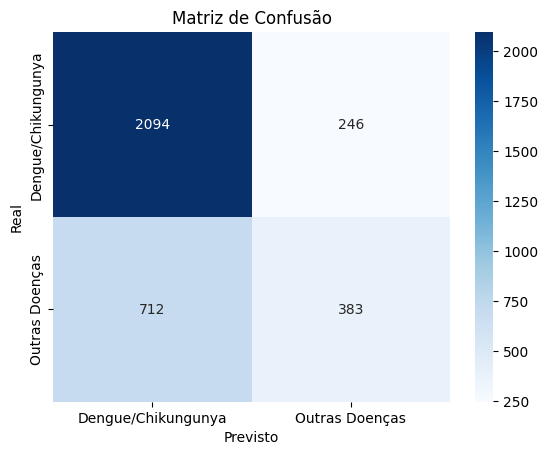

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Separar features (X) e target (y)
X = dengue.drop('CLASSI_FIN', axis=1)  # Todas as colunas, exceto a classificação
y = dengue['CLASSI_FIN']  # Apenas a coluna de classificação

from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X = scaler_census.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de Regressão Logística
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)  # Aumentamos max_iter para garantir convergência
modelo_lr.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_lr.predict(X_test)

# Métricas de avaliação
print("\nAcurácia (Regressão Logística):", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação (Regressão Logística):")
print(classification_report(y_test, y_pred, target_names=['Dengue/Chikungunya', 'Outras Doenças']))

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dengue/Chikungunya', 'Outras Doenças'],
            yticklabels=['Dengue/Chikungunya', 'Outras Doenças'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Salvando o Modelo Random Forest

In [161]:
!pip install joblib

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Exemplo: Treinar um modelo
X = dengue.drop('CLASSI_FIN', axis=1)  # Features
y = dengue['CLASSI_FIN']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Avaliar o modelo
y_pred = modelo.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.7219796215429404


In [163]:
# Salvar o modelo
import joblib
joblib.dump(modelo, 'modelo_dengue.pkl')

['modelo_dengue.pkl']

**Questionário**

In [164]:
import pandas as pd
import joblib

# Função para fazer perguntas e coletar respostas
def fazer_perguntas():
    print("Por favor, responda às perguntas com 'Sim' ou 'Não'.")
    sintomas = {
        'FEBRE': input("O paciente está com febre? ").strip().lower() == 'sim',
        'MIALGIA': input("O paciente está com mialgia (dor muscular)? ").strip().lower() == 'sim',
        'CEFALEIA': input("O paciente está com cefaleia (dor de cabeça)? ").strip().lower() == 'sim',
        'EXANTEMA': input("O paciente está com exantema (manchas na pele)? ").strip().lower() == 'sim',
        'ARTRALGIA': input("O paciente está com artralgia (dor nas articulações)? ").strip().lower() == 'sim',
    }
    return sintomas

# Carregar o modelo treinado
from google.colab import drive
drive.mount('/content/drive')  # Montar o Google Drive
modelo = joblib.load('/content/modelo_dengue.pkl')  # Substitua pelo caminho do seu modelo

# Fazer as perguntas
sintomas = fazer_perguntas()

# Criar um DataFrame com todas as colunas que o modelo espera
# Pegamos as colunas do modelo e preenchemos com 0 (ou outro valor padrão) para as colunas ausentes
colunas_do_modelo = modelo.feature_names_in_
dados_paciente = pd.DataFrame(columns=colunas_do_modelo)

# Preencher os valores das colunas que temos
for coluna in sintomas:
    dados_paciente[coluna] = [sintomas[coluna]]

# Preencher as colunas ausentes com 0 (ou outro valor padrão)
dados_paciente = dados_paciente.fillna(0)

# Fazer a previsão
probabilidade = modelo.predict_proba(dados_paciente)[0][1]  # Probabilidade de dengue
classificacao = modelo.predict(dados_paciente)[0]  # Classificação (0 = Outra doença, 1 = Dengue)

# Exibir resultados
print("\nResultado da Triagem:")
if classificacao == 1:
    print(f"Possível Dengue (Probabilidade: {probabilidade * 100:.2f}%)")
else:
    print(f"Outra Doença (Probabilidade de Dengue: {probabilidade * 100:.2f}%)")

Mounted at /content/drive
Por favor, responda às perguntas com 'Sim' ou 'Não'.
O paciente está com febre? Sim
O paciente está com mialgia (dor muscular)? Sim
O paciente está com cefaleia (dor de cabeça)? Não
O paciente está com exantema (manchas na pele)? Não
O paciente está com artralgia (dor nas articulações)? Sim

Resultado da Triagem:
Possível Dengue (Probabilidade: 55.58%)
